In [618]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [619]:
#known parameters
m = 2
b= 3



In [620]:
#create data
x = torch.arange(0,1,0.02)
y = m*x + b

x, y

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
         0.9000, 0.9200, 0.9400, 0.9600, 0.9800]),
 tensor([3.0000, 3.0400, 3.0800, 3.1200, 3.1600, 3.2000, 3.2400, 3.2800, 3.3200,
         3.3600, 3.4000, 3.4400, 3.4800, 3.5200, 3.5600, 3.6000, 3.6400, 3.6800,
         3.7200, 3.7600, 3.8000, 3.8400, 3.8800, 3.9200, 3.9600, 4.0000, 4.0400,
         4.0800, 4.1200, 4.1600, 4.2000, 4.2400, 4.2800, 4.3200, 4.3600, 4.4000,
         4.4400, 4.4800, 4.5200, 4.5600, 4.6000, 4.6400, 4.6800, 4.7200, 4.7600,
         4.8000, 4.8400, 4.8800, 4.9200, 4.9600]))

In [621]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [622]:
[len(x) for x in [x_train, x_test, y_train, y_test]]

[40, 10, 40, 10]

In [623]:
x_train

tensor([0.4800, 0.9800, 0.6000, 0.4000, 0.9200, 0.4600, 0.3200, 0.8000, 0.4400,
        0.5400, 0.6800, 0.1200, 0.2400, 0.4200, 0.9600, 0.5200, 0.0600, 0.7800,
        0.3000, 0.7200, 0.1000, 0.3600, 0.9000, 0.8800, 0.0200, 0.5000, 0.7600,
        0.0000, 0.7000, 0.2200, 0.7400, 0.0400, 0.6400, 0.8400, 0.6200, 0.6600,
        0.3800, 0.5600, 0.0800, 0.1600])

In [624]:
def plot_pred(train_x = x_train, train_y = y_train, x_test = x_test, y_test = y_test, pred=None):
    plt.figure(figsize=(10,10))
    plt.scatter(x_train, y_train, c='blue', label='training data')
    plt.scatter(x_test, y_test, c='green', label='test_data')

    if pred is not None:
        plt.scatter(x_test, pred, c='red', label='prediction')
    plt.legend()

    plt.show()


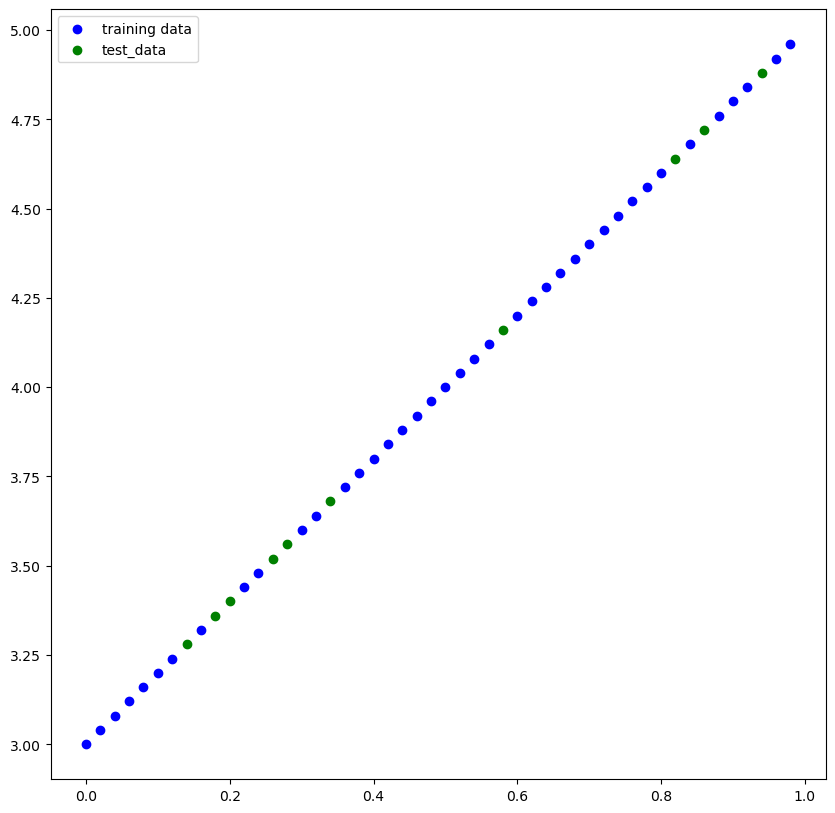

In [625]:
plot_pred()

In [626]:
class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1), 
                                                requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1), requires_grad=True)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights*x + self.bias    



In [627]:
torch.manual_seed(42)

In [628]:
m0 = LinearRegressor()

In [629]:
list(m0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [630]:
m0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [631]:
with torch.inference_mode():
    y_pred = m0(x_test)

y_pred

tensor([0.2433, 0.4184, 0.3241, 0.1759, 0.1894, 0.4049, 0.2231, 0.4453, 0.1961,
        0.2163])

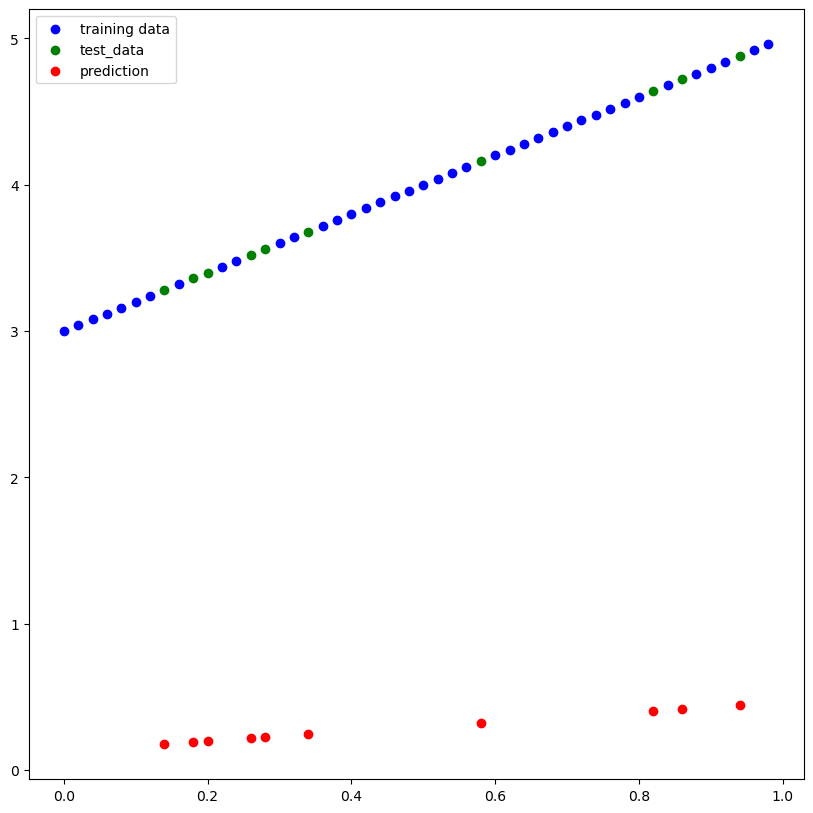

In [632]:
plot_pred(pred = y_pred)

In [633]:
y_test - y_pred

tensor([3.4367, 4.3016, 3.8359, 3.1041, 3.1706, 4.2351, 3.3369, 4.4347, 3.2039,
        3.3037])

In [634]:
loss_fn = nn.L1Loss()

In [635]:
list(m0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [636]:
optimizer = torch.optim.SGD(params = m0.parameters(), lr = 0.1)

In [637]:
epochs = 100

train_losses = []
test_losses = []
epoch_count = []

In [638]:
for epoch in range(epochs):
    m0.train()

    y_pred = m0(x_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    m0.eval()

    with torch.inference_mode():
        test_pred = m0(x_test)

        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        if epoch%10==0:
            epoch_count.append(epoch)
            train_losses.append(loss.detach().numpy())
            test_losses.append(test_loss.detach().numpy())
            print(f"epoch: {epoch} | train loss: {loss} | test loss: {test_loss}")



epoch: 0 | train loss: 3.6986873149871826 | test loss: 3.513427734375
epoch: 10 | train loss: 2.4511804580688477 | test loss: 2.2845778465270996
epoch: 20 | train loss: 1.2036744356155396 | test loss: 1.0557277202606201
epoch: 30 | train loss: 0.042147278785705566 | test loss: 0.04447457939386368
epoch: 40 | train loss: 0.10228951275348663 | test loss: 0.023693252354860306
epoch: 50 | train loss: 0.10228951275348663 | test loss: 0.023693252354860306
epoch: 60 | train loss: 0.10228951275348663 | test loss: 0.023693252354860306
epoch: 70 | train loss: 0.10228951275348663 | test loss: 0.023693252354860306
epoch: 80 | train loss: 0.10228951275348663 | test loss: 0.023693252354860306
epoch: 90 | train loss: 0.10228951275348663 | test loss: 0.023693252354860306


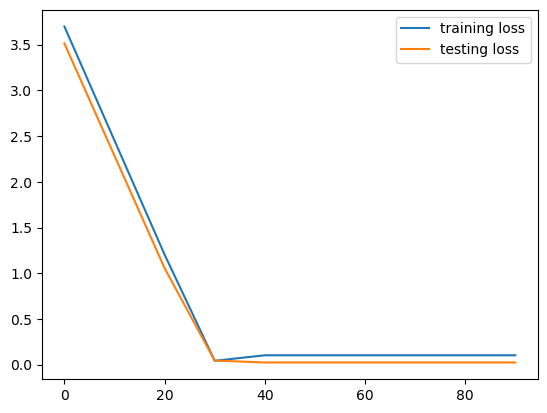

In [639]:
plt.plot(epoch_count, train_losses, label='training loss')
plt.plot(epoch_count, test_losses, label = 'testing loss')
plt.legend()

In [640]:
m0.state_dict()

OrderedDict([('weights', tensor([1.9174])), ('bias', tensor([2.9388]))])

In [641]:
m0.eval()

with torch.inference_mode():
    y_pred = m0(x_test)

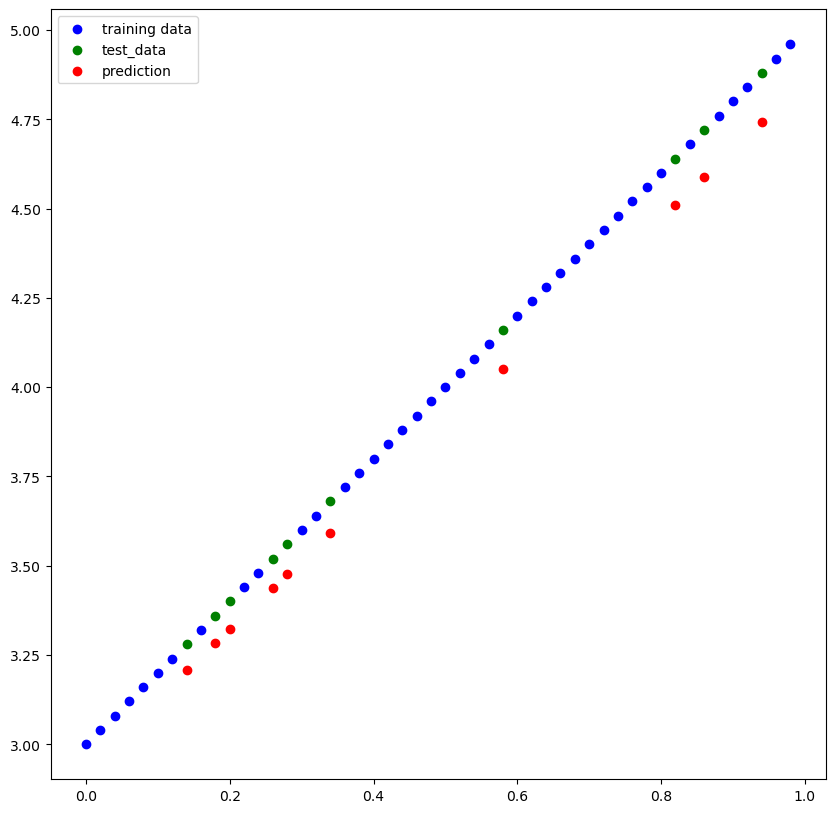

In [642]:
plot_pred(pred=y_pred)

In [643]:
class LinearRegressor2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linearlayer1 = nn.Linear(in_features = 1, out_features = 1)
    
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linearlayer1(x)


In [644]:
torch.manual_seed(31)

In [645]:
m1 = LinearRegressor2()

In [646]:
m1.state_dict()

OrderedDict([('linearlayer1.weight', tensor([[-0.5404]])),
             ('linearlayer1.bias', tensor([-0.1563]))])

In [647]:
m1

LinearRegressor2(
  (linearlayer1): Linear(in_features=1, out_features=1, bias=True)
)

In [648]:
lossfn = nn.L1Loss()

optim = torch.optim.SGD(params=m1.parameters(), lr=0.1)

In [649]:
optim

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [650]:
epochs = 1000

In [651]:
training_losses = []
testing_losses = []
epochs_count = []

In [652]:
m1.state_dict()

OrderedDict([('linearlayer1.weight', tensor([[-0.5404]])),
             ('linearlayer1.bias', tensor([-0.1563]))])

In [653]:
def unsqueeze(data):
    data = torch.unsqueeze(data, dim=1)
    return data


x_train = unsqueeze(x_train)
x_test = unsqueeze(x_test)
y_train = unsqueeze(y_train)
y_test = unsqueeze(y_test)

In [654]:
for epoch in range(epochs):
    m1.train()

    y_pred = m1(x_train)

    training_loss = lossfn(y_pred, y_train)

    optim.zero_grad()

    training_loss.backward()

    optim.step()

    m1.eval()

    with torch.inference_mode():
        y_pred = m1(x_test)

        testing_loss = lossfn(y_pred, y_test)

    if epoch%100==0:
        training_losses.append(training_loss.detach().numpy())
        testing_losses.append(testing_loss.detach().numpy())
        epochs_count.append(epoch)

In [655]:
m1.state_dict()

OrderedDict([('linearlayer1.weight', tensor([[1.9082]])),
             ('linearlayer1.bias', tensor([2.9687]))])

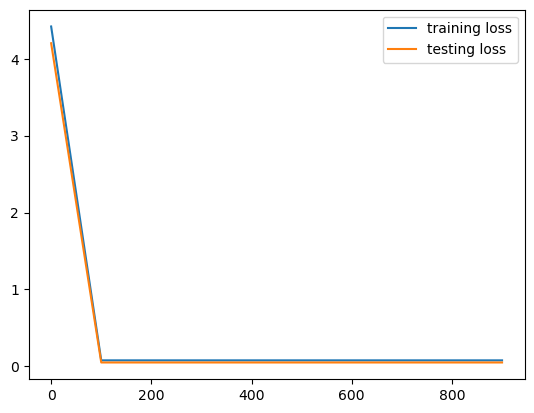

In [656]:
plt.plot(epochs_count, training_losses, label='training loss')
plt.plot(epochs_count, testing_losses, label='testing loss')
plt.legend()


In [657]:
training_losses

[array(4.42017, dtype=float32),
 array(0.07699208, dtype=float32),
 array(0.07699208, dtype=float32),
 array(0.07699208, dtype=float32),
 array(0.07699208, dtype=float32),
 array(0.07699208, dtype=float32),
 array(0.07699208, dtype=float32),
 array(0.07699208, dtype=float32),
 array(0.07699208, dtype=float32),
 array(0.07699208, dtype=float32)]